# IU 4.6 - Machine Learning Regression - EDA, data cleanining and modelling

### 	The dataset has Sale price of houses and various features related to the house, location and sale

We are required to understand the data and build a regression model to predict the Sale price of houses given all the features mentioned

Refer to data_description.txt file in order to understand more about columns

# Section 1 - Import Libraries and Data 

#### Import packages

In [2]:
# import all required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read datasets

There are two datasets train and test as is required for modelling purposes. Model is built on train and then accuracy validated on test data

In [3]:
# read train and test data


# print the shape of test and train datasets

# print the top rows of train data


(1460, 81)
(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# print datatypes of the columns
print(train.dtypes[0:5])

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object


## Section 2 - EDA Exercise

#### Subset numeric columns

In [5]:
# Get all numeric variables
# create a list of numeric types
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# select only those columns that are of numeric data type using the variable numerics


# print shape and top rows of numeric variables


(1460, 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
# Summarize numeric columns using describe method


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Subset categorical columns

In [7]:
# Get all categorical variables
# select only those columns that are of data type 'object'


# print the shape and top rows of categorical variables


(1460, 43)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [8]:
# Summarize categorical columns using describe method
# pro tip: work with include= paramater in the describe method


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


#### Distribution of House price

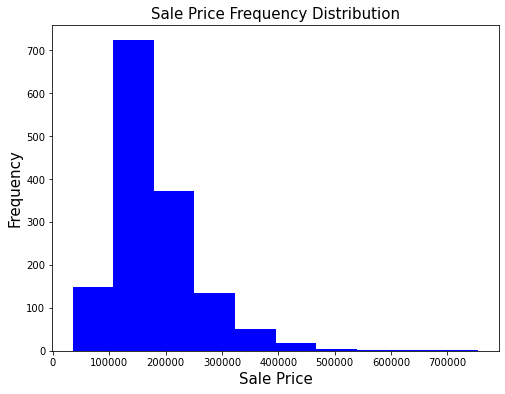

In [10]:
# Histogram of target variable
# create a figure of size 8, 6 using matplotlib

# assign an xlabel with font size 15

# assign y label with font size 15

# add a title with font size 15

# plot histogram of SalePrice column in train data

# show the plot


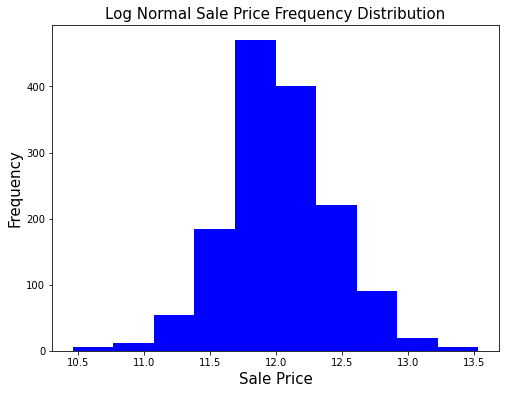

In [11]:
# Log normal histogram of target variable
# create a target variable list by taking log of the "SalePrice" column in train
# hint: use np.log function

# Repeat the procedure from previous cell to plot the log distribution


Get the correlation of numeric columns with House price and each others

In [13]:
# Get correlation of numeric variables
# use corr function on numeric features dataframe

# select "SalePrice" column in correlation dataframe and sort values by descending
# this is to see top variables that are correlated with SalePrice


SalePrice        100.000000
OverallQual       79.098160
GrLivArea         70.862448
GarageCars        64.040920
GarageArea        62.343144
TotalBsmtSF       61.358055
1stFlrSF          60.585218
FullBath          56.066376
TotRmsAbvGrd      53.372316
YearBuilt         52.289733
YearRemodAdd      50.710097
GarageYrBlt       48.636168
MasVnrArea        47.749305
Fireplaces        46.692884
BsmtFinSF1        38.641981
LotFrontage       35.179910
WoodDeckSF        32.441344
2ndFlrSF          31.933380
OpenPorchSF       31.585623
HalfBath          28.410768
LotArea           26.384335
BsmtFullBath      22.712223
BsmtUnfSF         21.447911
BedroomAbvGr      16.821315
ScreenPorch       11.144657
PoolArea           9.240355
MoSold             4.643225
3SsnPorch          4.458367
BsmtFinSF2        -1.137812
BsmtHalfBath      -1.684415
MiscVal           -2.118958
Id                -2.191672
LowQualFinSF      -2.560613
YrSold            -2.892259
OverallCond       -7.785589
MSSubClass        -8

<AxesSubplot:title={'center':'Correlation of Numeric Featuer with Sale Price'}>

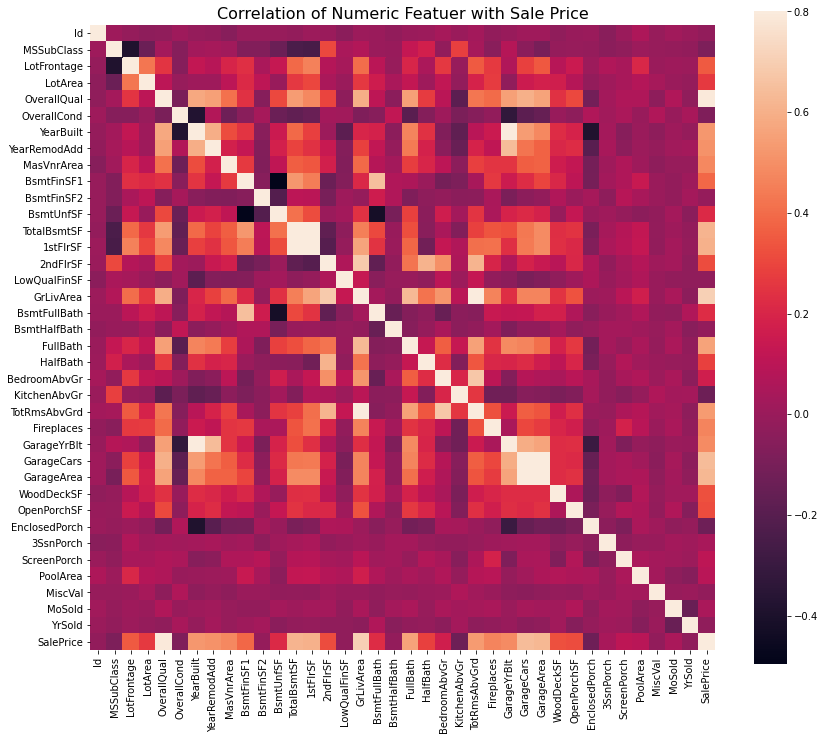

In [15]:
# Correlation Heat Map (Seaborn library)
# create a figure using matplotlib

# add title

# add heatmap from seabourn passing "correlation" dataframe with options square=True and vmax=0.8
# vmax caps the heatmap color to be same if value is 0.8 or more


In [15]:
# Drop correlated variables


#### Missing value Treatment - Remove variable with excess Nulls

In [18]:
# Delete missing values variables from the dataset
train.drop(["PoolQC","MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1,inplace=True)
test.drop(["PoolQC","MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1,inplace=True)

In [19]:
# Delete numeric features which are not correlated from the train data
train.drop(["GarageYrBlt", "MasVnrArea", "Fireplaces", "BsmtFinSF1", "LotFrontage", "WoodDeckSF", "2ndFlrSF",
"OpenPorchSF", "HalfBath", "LotArea", "BsmtFullBath", "BsmtUnfSF", "BedroomAbvGr", "ScreenPorch",
"PoolArea", "MoSold", "3SsnPorch", "BsmtFinSF2", "BsmtHalfBath", "MiscVal", "Id", "LowQualFinSF",
"YrSold", "OverallCond", "MSSubClass", "EnclosedPorch", "KitchenAbvGr"], axis=1, inplace=True)

In [20]:
# Delet numeric features which are not correlated from the test data
test.drop(["GarageYrBlt", "MasVnrArea", "Fireplaces", "BsmtFinSF1", "LotFrontage", "WoodDeckSF", "2ndFlrSF",
"OpenPorchSF", "HalfBath", "LotArea", "BsmtFullBath", "BsmtUnfSF", "BedroomAbvGr", "ScreenPorch",
"PoolArea", "MoSold", "3SsnPorch", "BsmtFinSF2", "BsmtHalfBath", "MiscVal", "Id", "LowQualFinSF",
"YrSold", "OverallCond", "MSSubClass", "EnclosedPorch", "KitchenAbvGr"], axis=1, inplace=True)

In [21]:
# Check shape of train data and test data
train.shape, test.shape

((1460, 46), (1459, 45))

In [23]:
# Get the remaining numeric variables
# select only numerical featues from train dataset and assign it to numeric_features

# display the dataframe having remaining numerical features

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,7,2003,2003,856,1710,2,2,208500
1,6,1976,1976,1262,1262,2,2,181500
2,7,2001,2002,920,1786,2,2,223500
3,7,1915,1970,756,1717,1,3,140000
4,8,2000,2000,1145,2198,2,3,250000


In [24]:
# Get the correlation on latest numerical features


# print the correlations with "SalePrice"
# keep it sorted in descending order of correlation coefficient


SalePrice       100.000000
OverallQual      79.098160
GrLivArea        70.862448
GarageCars       64.040920
TotalBsmtSF      61.358055
FullBath         56.066376
YearBuilt        52.289733
YearRemodAdd     50.710097
Name: SalePrice, dtype: float64

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


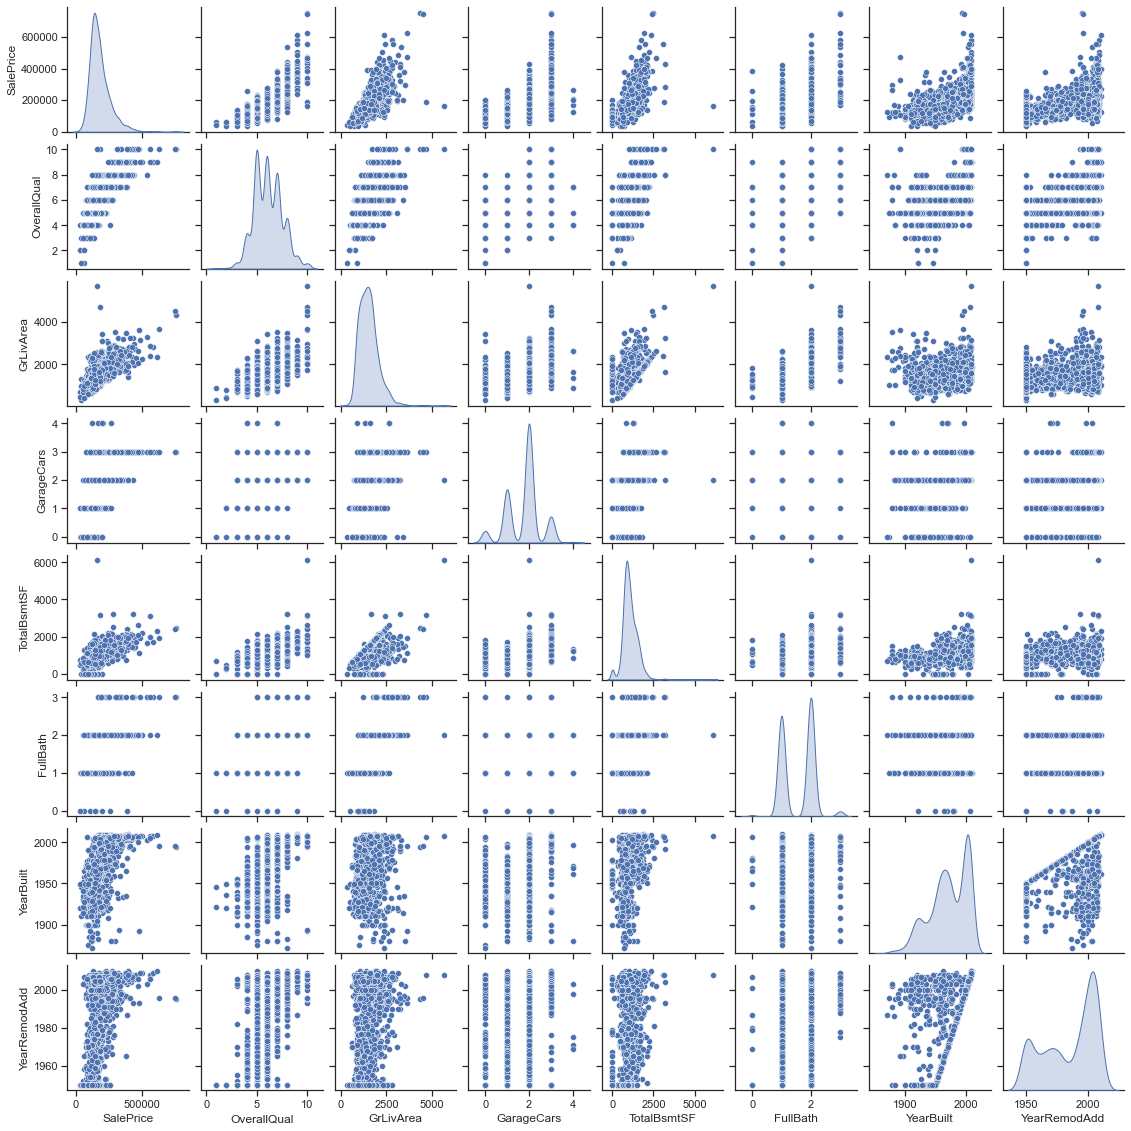

In [25]:
# Pairplot of numeric variables

# set the sebourn style to "ticks" and color_codes to True


# select columns to plot
columns= ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF","FullBath", 
         "YearBuilt", "YearRemodAdd"]

# use seabourn pairplot function to plot selected columns from train dataframe
# use following parameters size=2, kind="Scatter", diag_kind="kde"

# show the plot


## Section 3 - Feature Engineering

In [45]:
# Label Encoding some categorical variables that may contain information in their ordering set
# import LabelEncoder package

# list of columns that need label encoding (categorical columns)
# exercise: compare this list with list of categorical columns that you identified
cols= ('Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSZoning')
# Process columns, apply LabelEncoder to categories features
# create a for loop to iterate across all columns
for c in cols:
    # create a LabelEncoder object lbl
    
    # fit the lbl object with list of values in the column corresponding to the for loop iteration
    
    # apply transform method to lbl over the existing values
    # assign encoded values back to the original column
    
# do the same label encoding for test dataset


# Shape
print('Shape all_data: {}'.format(train.shape))
print('Shape all_data: {}'.format(test.shape))

Shape all_data: (1458, 45)
Shape all_data: (1459, 44)


In [47]:
# Drop uncorrelated variables (Less than 50% Correlation)
train.drop(["Foundation", "CentralAir", "GarageCond", "Electrical", "PavedDrive",
           "RoofStyle", "SaleCondition", "Neighborhood", "GarageQual", "HouseStyle",
           "RoofMatl", "ExterCond", "Functional", "Exterior2nd", "Exterior1st", "BsmtCond",
           "Condition1", "BsmtFinType2", "LandSlope", "Street", "MasVnrType", "LandContour",
           "Condition2", "SaleType", "LotConfig", "BldgType", "BsmtFinType1", "Heating",
           "LotShape", "BsmtExposure", "HeatingQC", "GarageType", "GarageFinish", "MSZoning"], axis=1, inplace=True)

test.drop(["Foundation", "CentralAir", "GarageCond", "Electrical", "PavedDrive",
           "RoofStyle", "SaleCondition", "Neighborhood", "GarageQual", "HouseStyle",
           "RoofMatl", "ExterCond", "Functional", "Exterior2nd", "Exterior1st", "BsmtCond",
           "Condition1", "BsmtFinType2", "LandSlope", "Street", "MasVnrType", "LandContour",
           "Condition2", "SaleType", "LotConfig", "BldgType", "BsmtFinType1", "Heating",
           "LotShape", "BsmtExposure", "HeatingQC", "GarageType", "GarageFinish", "MSZoning"], axis=1, inplace=True)

In [48]:
correlation_one= train.corr()
correlation_one["SalePrice"].sort_values(ascending=False)*100

# SalePrice   : What is the price of a house
# OverallQual : Overall material and finish quality
# GrLivArea   : Above grade Ground living area square feet
# TotalBsmtSF : Total Square feet of basement area
# GarageCars  : Size of garage in car capacity
# FullBath    : Full bathroom above grade
# YearBuilt   : Original Construction date
# YearRemodAdd: Remodel date
# KitchenQual : Kitchen Quality
# BsmtQual    : Height of the basement
# ExterQual   : Exterior material Quality

SalePrice       100.000000
OverallQual      79.577427
GrLivArea        73.496816
TotalBsmtSF      65.115291
GarageCars       64.104701
FullBath         56.216475
YearBuilt        52.360840
YearRemodAdd     50.771664
KitchenQual     -59.286051
BsmtQual        -59.592332
ExterQual       -64.338104
Name: SalePrice, dtype: float64

## Section 4 - Modelling Exercise

In [49]:
# Model Building
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [50]:
# Reshape the data
train.shape, test.shape
test.drop(test.index[1458], inplace=True)
train.shape, test.shape

((1458, 11), (1458, 10))

In [51]:
# Prepare data for modeling


# Split the data and check the shape of the data


((1020, 10), (438, 10), (1020,), (438,))

In [52]:
# Instantiate the model using LinearRegression function from sklearn

# Fit the model


# Make predictions


In [53]:
# Get the coefficient and intercept of the model


-540580.8690180152
[ 12936.43437439    175.88179984    115.13715403  -8326.4738911
  -7280.47942554     41.69106268     66.52675434 -14816.39384883
 -11130.68620938   7730.58847967]


In [54]:
# Pair the feature name with the coefficient


[('OverallQual', 12936.434374388302),
 ('YearBuilt', 175.8817998358142),
 ('YearRemodAdd', 115.13715403086394),
 ('ExterQual', -8326.4738910953),
 ('BsmtQual', -7280.479425542),
 ('TotalBsmtSF', 41.691062684051154),
 ('GrLivArea', 66.52675434412744),
 ('FullBath', -14816.393848825308),
 ('KitchenQual', -11130.686209378731),
 ('GarageCars', 7730.588479666248)]

In [55]:
# Print R square

# So, in our model, 81.51% of the variability in Y can be explained using X.

R Square  0.8151794402987389


In [56]:
# Mean Absolute Deviation


MAE: 22471.484625962366


In [57]:
# Mean Square Error


MSE: 926045575.5713309


In [58]:
# Root Mean square Error

# Our model was able to predict the value of every house in the test set within $30430 of the real price.

RMSE: 30430.99695329305


# Appendix

#### Find the skewness in data

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Skewness', ylabel='Density'>

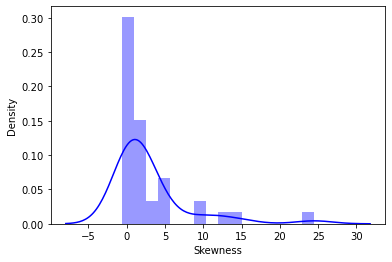

In [9]:
# Skewness plot
# use distplot to plat the distribution of the skewness of train data
# use skew method to find skewness of train data


#### Distribution of sales for various levels of Overall Quality

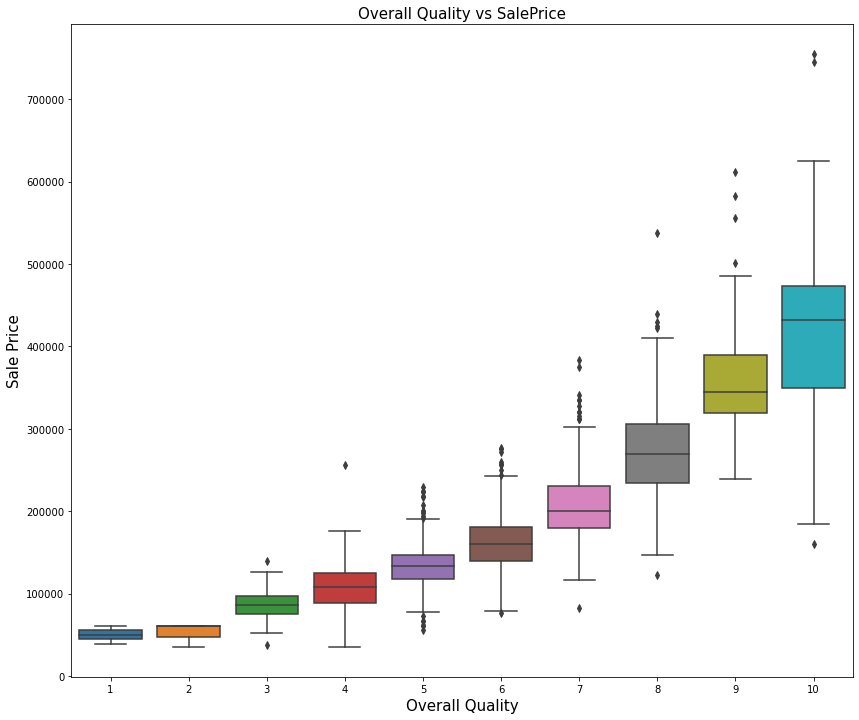

In [12]:
# Boxplot of OverallQuality and SalePrice
# Create a matplotlib figure with size 14,12

# plot a boxplot using seabourn on train data with y variable as "SalePrice" and x as "OverallQual"

# add title

# add label to x axis using xlabel

# add label to y axis using ylabel

# show the plot


#### Missing value analysis

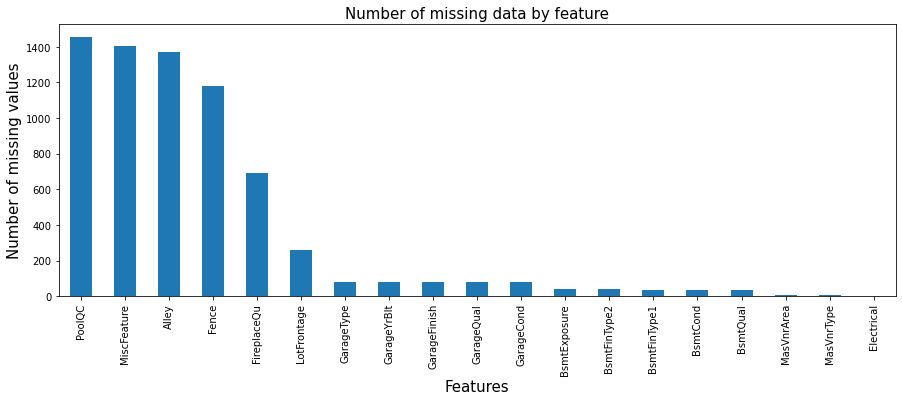

In [16]:
# Plot missing values
# create a figure with matplotlib

# create a boolean series to show if the data is null for various columns

# filter for those columns having missing > 0

# sort the values in descending order

# add x label to plot

# add y label to the plot

# add title to the plot

# plot the missing data series using kind="bar"

# show the plot


#### Correlation Plot of highly correlated variables with SalesPrice

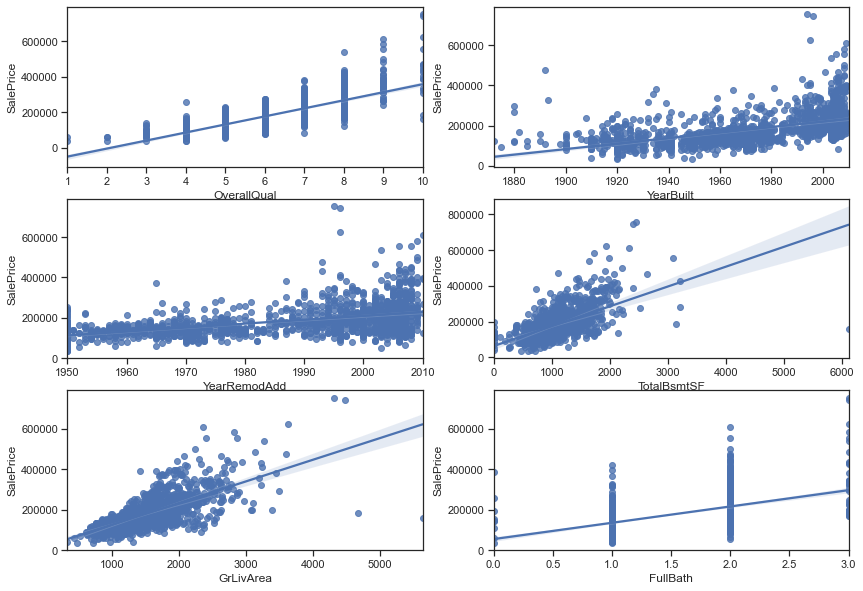

In [26]:
# Get the correlation plot of numeric variable with the target variable

# create a figure with a grid of multiple plots within it
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6))= plt.subplots(nrows=3, ncols=2, figsize=(14,10))

# plot 6 regression plots to see the relationship
sns.regplot(x=train["OverallQual"], y=train["SalePrice"], scatter= True, fit_reg= True, ax=ax1)

sns.regplot(x=train["YearBuilt"], y=train["SalePrice"], scatter=True, fit_reg= True, ax=ax2)

sns.regplot(x=train["YearRemodAdd"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax3)

sns.regplot(x=train["TotalBsmtSF"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax4)

sns.regplot(x=train["GrLivArea"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax5)

sns.regplot(x=train["FullBath"], y=train["SalePrice"], scatter=True, fit_reg=True, ax=ax6)

# show the plot
plt.show()


In [17]:
# Get total and percent missing values
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageQual,81,5.547945
GarageCond,81,5.547945


In [27]:
# Check missing values in categorical variable
# get the null value count and sort it decending


# find the percentage of null values and sort it descending


# merge both total counts and percentage missing values
# hint: try doing this using merge function instead of concat


# pring the missing values (top 10)


,Total,Percent
GarageFinish,81,5.547945
GarageCond,81,5.547945
GarageQual,81,5.547945
GarageType,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247
MasVnrType,8,0.547945


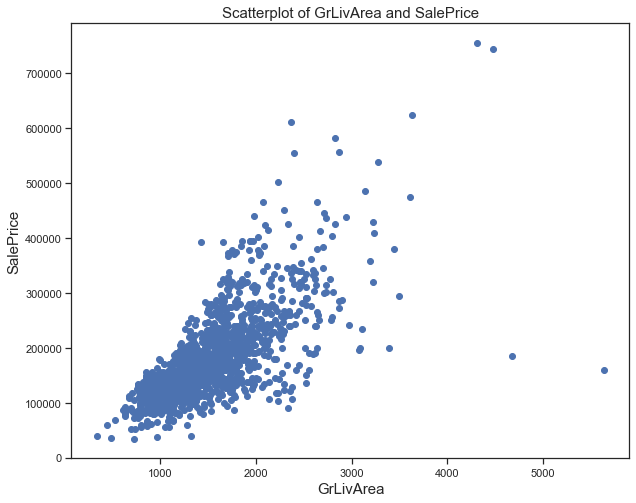

In [28]:
# Outlier detection
# create a figure using plt with figsize of 10,8


# add plot title for GrLivArea vs SalePrice plot with fontsize of 15


# add x label "GrLivArea"


# add y label "SalePrice"


# plot a scatter plot with x being the column "GrLivArea" and y being the column "SalePrice"


# Remove outlier from the data after identifying
# from graph we see - GrLivArea > 4000 for SalePrice < 300000 needs to be removed
# such high living area for such low price is an outlier
# question: what does inplace=True mean?


#### Missing value analysis - 2

In [30]:
# Again check the missing values in remaining variables
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(4)

,Total,Percent
GarageFinish,81,5.555556
GarageCond,81,5.555556
GarageQual,81,5.555556
GarageType,81,5.555556


C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


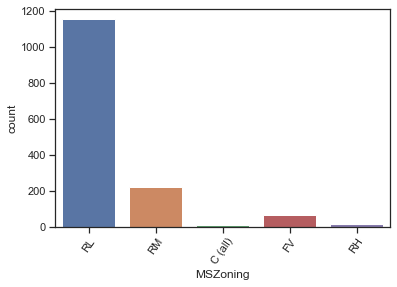

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


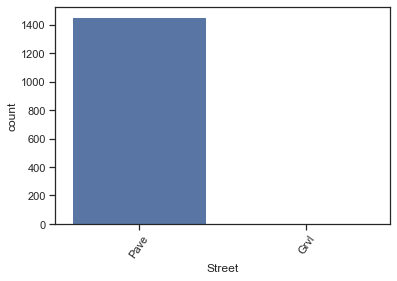

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


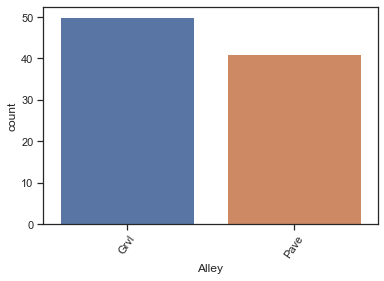

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


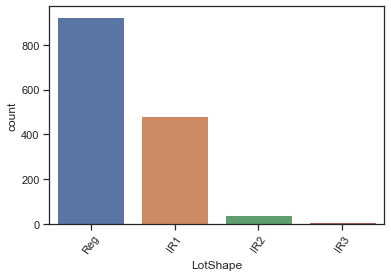

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


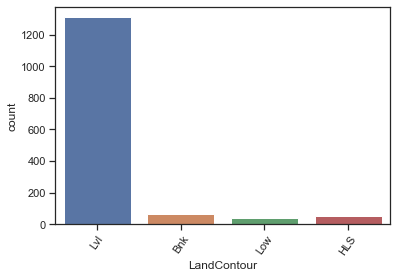

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


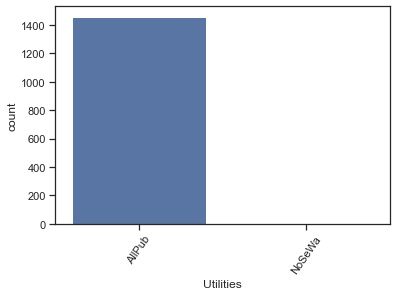

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


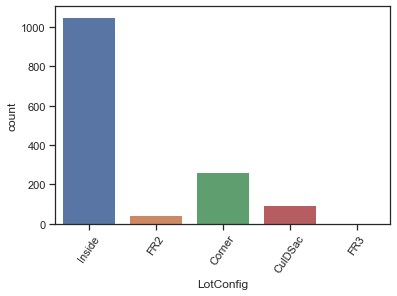

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


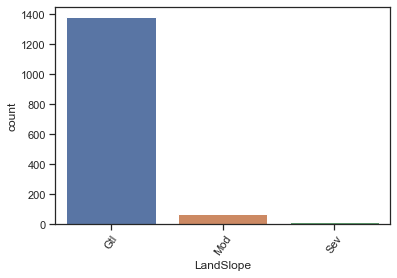

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


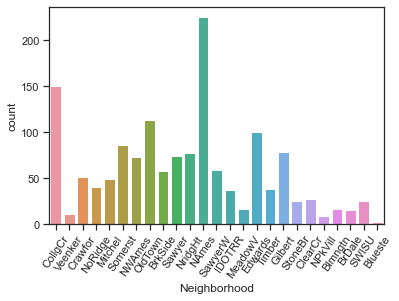

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


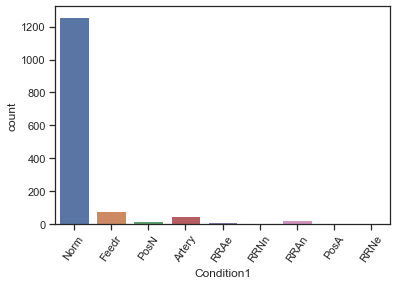

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


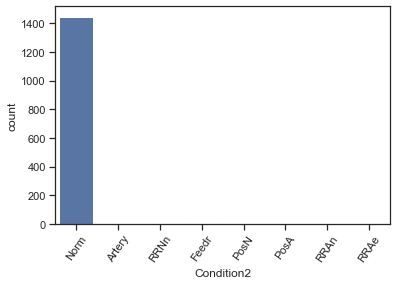

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


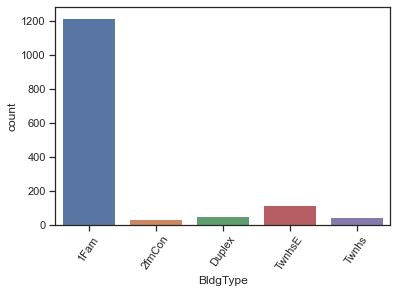

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


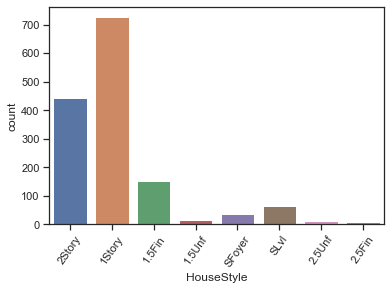

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


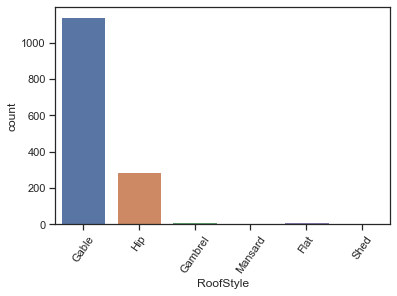

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


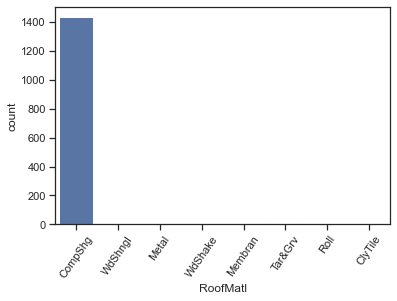

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


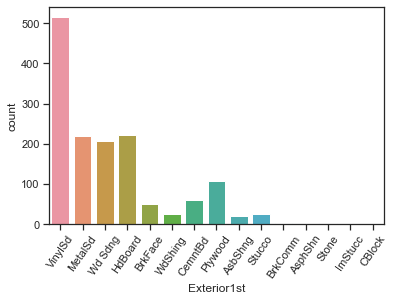

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


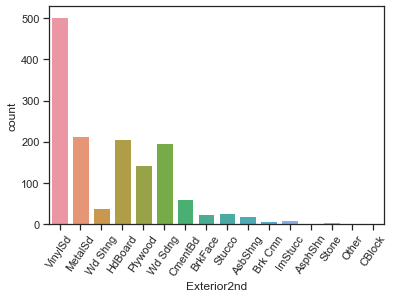

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


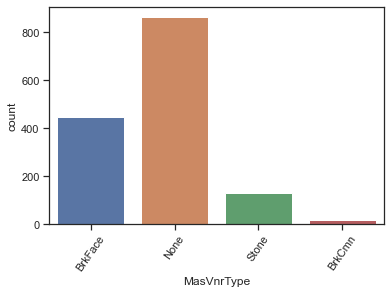

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


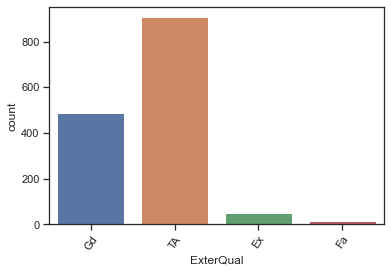

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


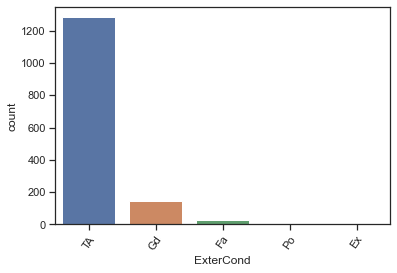

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


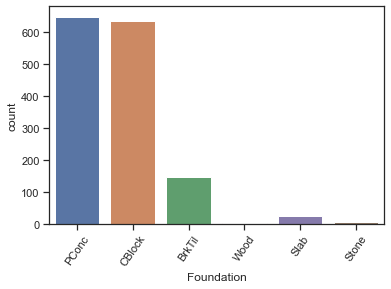

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


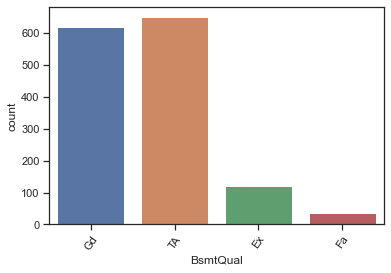

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


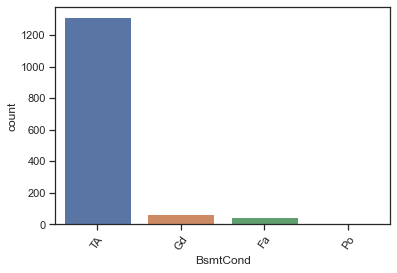

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


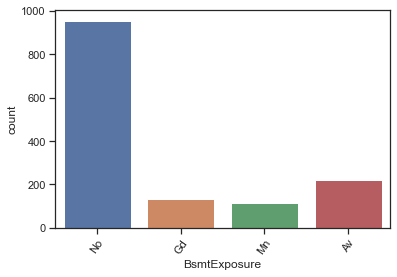

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


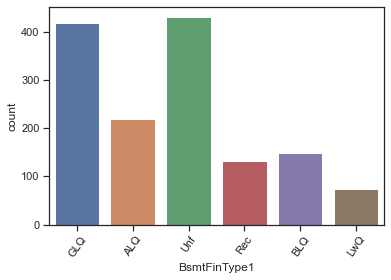

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


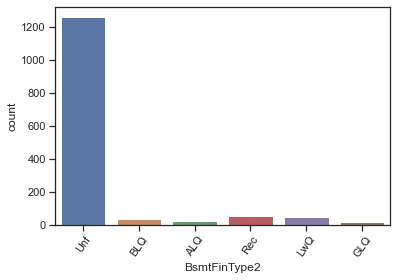

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


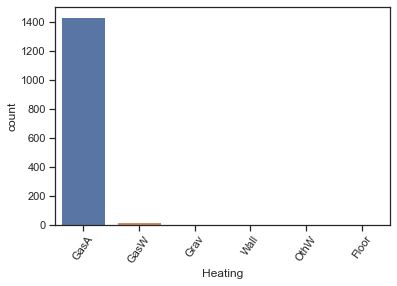

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


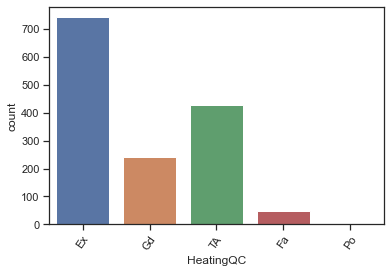

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


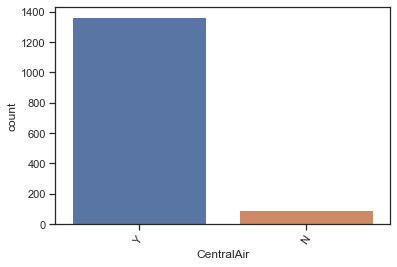

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


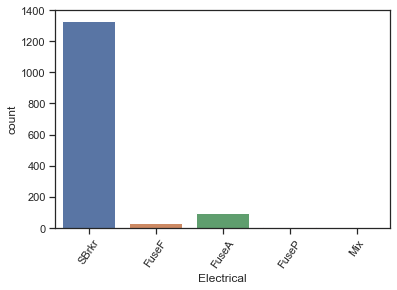

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


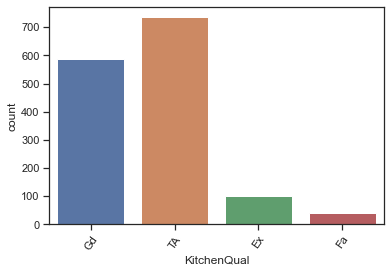

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


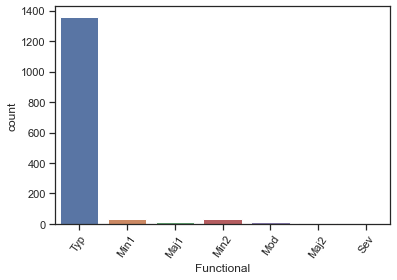

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


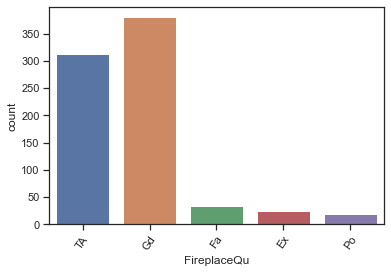

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


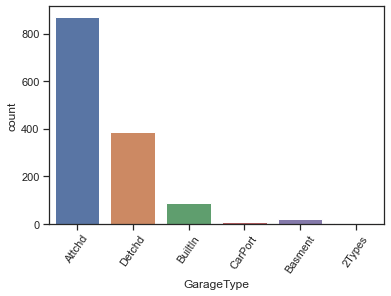

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


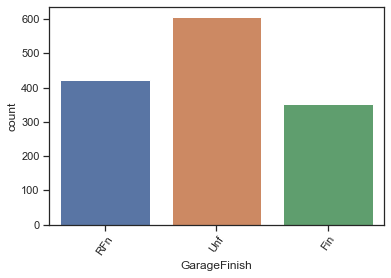

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


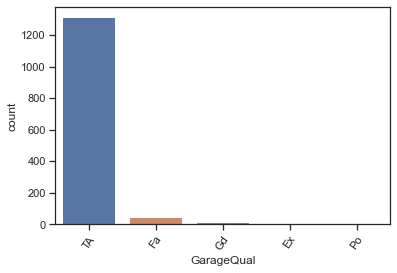

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


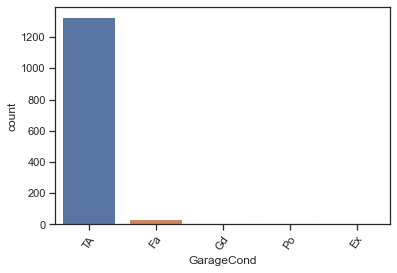

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


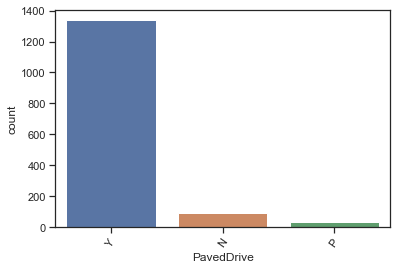

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


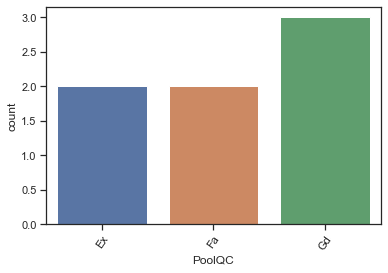

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


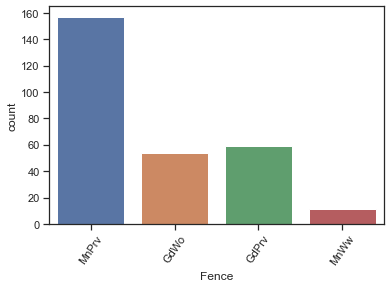

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


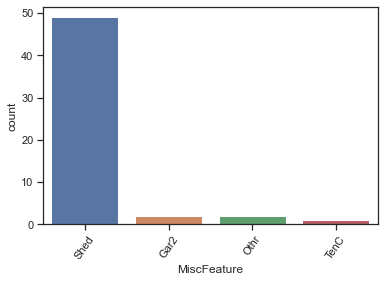

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


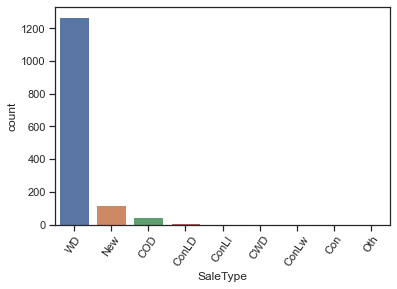

C:\ProgramData\Anaconda3\envs\RISE\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


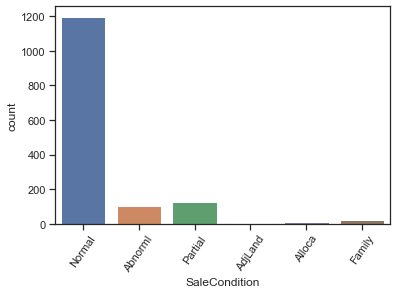

In [29]:
# plot the distribution across various categorical features again
# run a for loop across all categorical columns

    # additional condition to ensure column dtype is 'object'
    
        # use a countplot in seabourn with data as categorical_features and selected column
    
        # add xticks with rotation=55

        # show the plot
       